In [2]:
import matplotlib.pyplot as plt
import pickle
import torch
import numpy as np
import seaborn as sns
from  pcdet.utils import common_utils 
import matplotlib.patches as patches

/mnt/data/anaconda3/envs/adat_pcdetv5/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = '/mnt/data/deka01/openpcdet_st/tools/only_sh_points.pkl'

# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    data = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/deka01/openpcdet_st/tools/only_sh_points.pkl'

In [11]:
file_path = '/mnt/data/deka01/openpcdet_st/tools/only_sh_points_80GB.pkl'
# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    data_1 = pickle.load(file)

In [73]:
file_path='/mnt/data/deka01/openpcdet_st/tools/only_sh_anchors.pkl'
# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    data = pickle.load(file)

## Spatial_features

Spatial_features is of shape 200,176,256 (HxWxC). I have summed the channels and plotted.(200,176)

In [4]:
agg_feat = torch.tensor(data['ens'][0]['spatial_features']).permute(1,2,0).sum(-1) # H,W,C sum over C
mean = torch.mean(agg_feat)
std = torch.std(agg_feat)
spatial_features = (agg_feat - mean) / std
spatial_features -= torch.min(spatial_features)
spatial_features /= torch.max(spatial_features)
spatial_features  = spatial_features.detach().cpu().numpy()
sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
plt.title('Scene 1')
# plt.imshow(spatial_features)
plt.show()

NameError: name 'data' is not defined

In [149]:
data['ens'][0]['gt_boxes'].shape
rois = torch.tensor(data['ens'][0]['gt_boxes']).unsqueeze(dim=0)
height, width = 200,176 #spatial_features_2d.size(2), spatial_features_2d.size(3)


In [150]:
def project(rois):
    min_x = 0
    min_y = -40
    voxel_size_x = 0.05
    voxel_size_y = 0.05
    down_sample_ratio = 8

    for b_id in range(rois.shape[0]):
        x1 = (rois[b_id, :, 0] - rois[b_id, :, 3] / 2 - min_x) / (voxel_size_x * down_sample_ratio)
        x2 = (rois[b_id, :, 0] + rois[b_id, :, 3] / 2 - min_x) / (voxel_size_x * down_sample_ratio)
        y1 = (rois[b_id, :, 1] - rois[b_id, :, 4] / 2 - min_y) / (voxel_size_y * down_sample_ratio)
        y2 = (rois[b_id, :, 1] + rois[b_id, :, 4] / 2 - min_y) / (voxel_size_y * down_sample_ratio)

        angle, _ = common_utils.check_numpy_to_torch(rois[b_id, :, 6])

        cosa = torch.cos(angle)
        sina = torch.sin(angle)

        theta = torch.stack((
            (x2 - x1) / (width - 1) * cosa, (x2 - x1) / (width - 1) * (-sina), (x1 + x2 - width + 1) / (width - 1),
            (y2 - y1) / (height - 1) * sina, (y2 - y1) / (height - 1) * cosa, (y1 + y2 - height + 1) / (height - 1)
        ), dim=1).view(-1, 2, 3).float()
    return theta

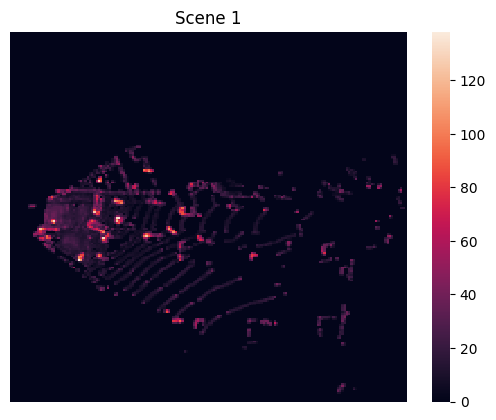

In [151]:
agg_feat = torch.tensor(data['ens'][0]['spatial_features']).permute(1,2,0).sum(-1) # H,W,C sum over C
# box = data['ens'][0]['anchors'][:,:,:,1,1,:].squeeze()
# box = data['ens'][0]['gt_boxes_bev'].squeeze()
gt_boxes = torch.tensor(data['ens'][0]['gt_boxes']).unsqueeze(dim=0)
box= project(gt_boxes).view(-1,6)

mean = torch.mean(agg_feat)
std = torch.std(agg_feat)
spatial_features = (agg_feat - mean) / std
spatial_features -= torch.min(spatial_features)
spatial_features /= torch.max(spatial_features)
spatial_features  = agg_feat.detach().cpu().numpy() #change back
sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
plt.title('Scene 1')
for i in range(box.shape[0]):
        x_min, y_min, x_max, y_max,_,_, = box[i,:]

        # Calculate box corner coordinates
        box_2d = [x_min, y_min, x_max, y_max]
        # Create a rectangle patch for the box
        # rect = patches.Rectangle((box_2d[0], box_2d[1]), box_2d[2] - box_2d[0], box_2d[3] - box_2d[1], linewidth=1, edgecolor='r', facecolor='none')        # Add the rectangle patch to the plot
        # plt.gca().add_patch(rect)

        # Add a label indicating the index of the box
        # ax.text(x, y, str(idx), color='r', fontsize=8, ha='center', va='center')

    # rect = patches.Rectangle((box[i,0],box[i,1]),box[i,2]-box[i,0],box[i,3]-box[i,1],linewidth=1,edgecolor='r',facecolor='none')
    # plt.gca().add_patch(rect)
# plt.imshow(spatial_features)
plt.show()

In [152]:
min_x = 0
min_y = -40
voxel_size_x = 0.05
voxel_size_y = 0.05
down_sample_ratio = 8

In [153]:
np.pi - data['ens'][scene]['gt_boxes'][:,6] 
import math
math.degrees(data['ens'][scene]['gt_boxes'][0,6])

-16.50062712901068

In [169]:
rois.shape

torch.Size([1, 30, 8])

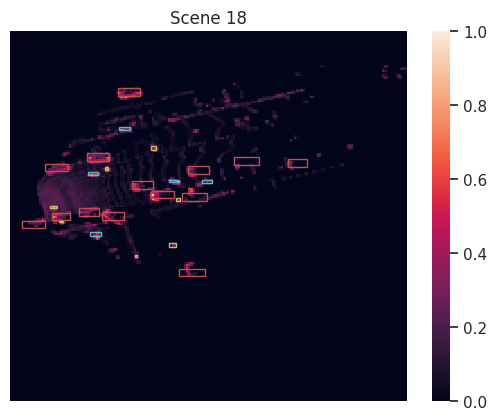

In [226]:
scene = 18
agg_feat = torch.tensor(data['ens'][scene]['spatial_features']).permute(1,2,0).sum(-1) # H,W,C sum over C
boxes=torch.tensor(data['ens'][scene]['gt_boxes'])
mean = torch.mean(agg_feat)
std = torch.std(agg_feat)
spatial_features = (agg_feat - mean) / std
spatial_features -= torch.min(spatial_features)
spatial_features /= torch.max(spatial_features)
spatial_features  = spatial_features.detach().cpu().numpy() #change back to spatial_features
sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
plt.title('Scene {}'.format(scene))
edgecolors = ['r','y','c']
for i in range(boxes.shape[0]):
        x1 = (boxes[i,0] - boxes[i,3] / 2 - min_x) / (voxel_size_x * down_sample_ratio)
        x2 = (boxes[i,0] + boxes[i,3] / 2 - min_x) / (voxel_size_x * down_sample_ratio)
        y1 = (boxes[i,1] - boxes[i,4] / 2 - min_y) / (voxel_size_y * down_sample_ratio)
        y2 = (boxes[i,1] + boxes[i,4] / 2 - min_y) / (voxel_size_y * down_sample_ratio)
        gt_class = int(data['ens'][scene]['gt_boxes'][i,-1])
        angle = boxes[i,6]
        c = np.cos(angle)
        s = np.sin(angle)
        R =  np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])
        # angle, _ = common_utils.check_numpy_to_torch(boxes[i,6])
        # angle = math.degrees(angle)
        # cosa = torch.cos(angle)
        # sina = torch.sin(angle)
        # theta = torch.stack((
        #     (x2 - x1) / (width - 1) * cosa, (x2 - x1) / (width - 1) * (-sina), (x1 + x2 - width + 1) / (width - 1),
        #     (y2 - y1) / (height - 1) * sina, (y2 - y1) / (height - 1) * cosa, (y1 + y2 - height + 1) / (height - 1)
        # ), dim=1)
        # Calculate box corner coordinates
        box_2d = [x1.item(), y1.item(), x2.item(), y2.item()]
        # Create a rectangle patch for the box
        rect = patches.Rectangle((box_2d[0], box_2d[1]), box_2d[2] - box_2d[0], box_2d[3] - box_2d[1], linewidth=1, edgecolor=edgecolors[gt_class-1], facecolor='none')        # Add the rectangle patch to the plot
        plt.gca().add_patch(rect)

plt.show()

Spatial_features_2d is of shape [512, 200, 176]. In HxWxC representation its 200x176x512. 
Summing across channels did not give a visually rich heatmap. Hence, I also visualize it channelwise(which help us visualize the distinctive features each channel learns)

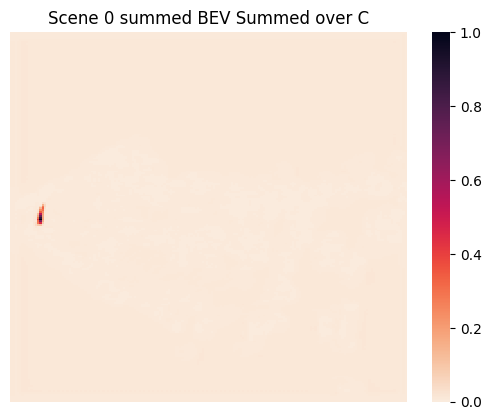

In [173]:
grid_feat_ = torch.tensor(data['ens'][0]['spatial_features_2d']).permute(1,2,0) # H,W,C
grid_feat =  grid_feat_.sum(-1)#H,W
mean = torch.mean(grid_feat)
std = torch.std(grid_feat)
spatial_features = (grid_feat - mean) / std
spatial_features -= torch.min(spatial_features)
spatial_features /= torch.max(spatial_features)
spatial_features = spatial_features.detach().cpu().numpy()
sns.heatmap(spatial_features,cmap=sns.color_palette("rocket_r",as_cmap=True),xticklabels=False, yticklabels=False)
plt.title('Scene 0 summed BEV Summed over C')
plt.show()

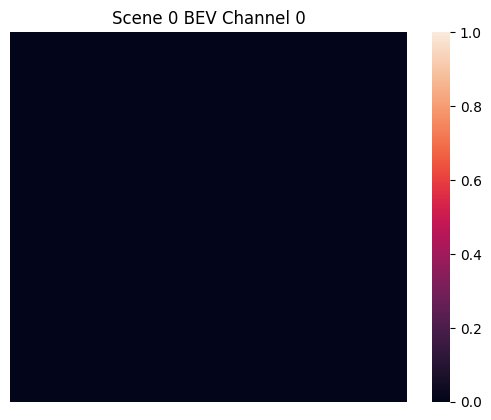

In [174]:
def plot_channelwise_BEV(channel=0):
    grid_feat_ = torch.tensor(data['ens'][0]['spatial_features_2d']).permute(1,2,0) # H,W,C
    grid_feat =  grid_feat_[:,:,channel]#H,W
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = (spatial_features.nan_to_num(0.0)).detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False,vmin=0, vmax=1)
    plt.title('Scene 0 BEV Channel {}'.format(channel))
    # plt.imshow(spatial_features)
    plt.show()
plot_channelwise_BEV(0)

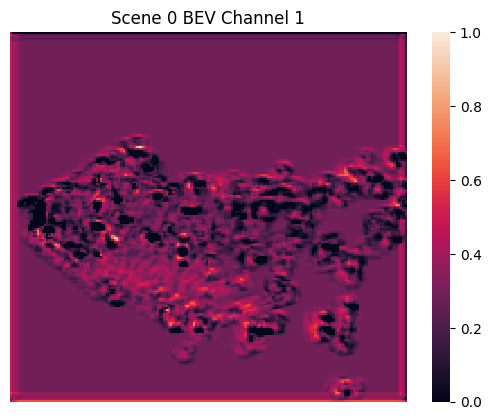

In [175]:
plot_channelwise_BEV(1)

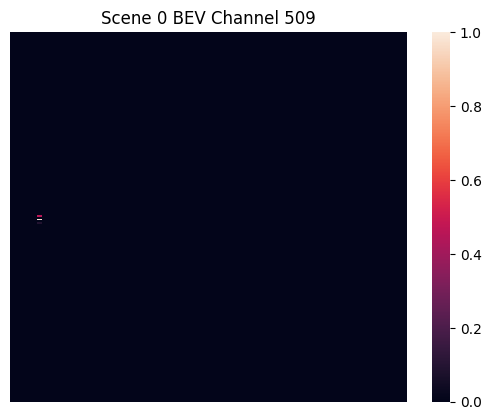

In [185]:
plot_channelwise_BEV(509)

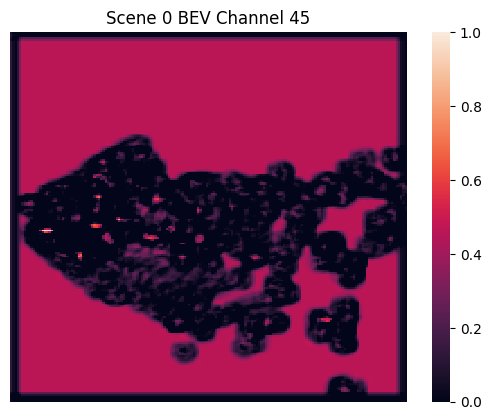

In [182]:
plot_channelwise_BEV(45)

##### Method 1
1. Permute (6,6,6,128)
2. sum along 3rd dimension (6,6,128)
3. select channelwise information and plot them (6,6,x) where x 0<=>127

#### Visualize the Pooled Features
Pooled_features_gt is of shape (128, 6, 6, 6) before permute. Can this be interpreted as 6x6x6x128 indicating that there are 128 features for each gridpoint?

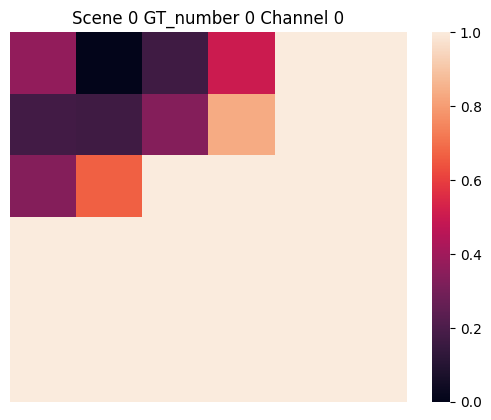

In [186]:
def plot_channelwise_grid_points(scene=0,gt_num=0,channel=0):
    grid_feat = torch.tensor(data['ens'][scene]['pooled_features_gt'][gt_num]).permute(1,2,3,0)# H,W,C
    grid_feat = grid_feat.sum(-2)
    grid_feat = grid_feat[:,:,channel] #H,W
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = (spatial_features.nan_to_num(0.0)).detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),vmin=0,vmax=1,xticklabels=False, yticklabels=False)
    plt.title('Scene {} GT_number {} Channel {}'.format(scene,gt_num,channel))
    plt.show()
plot_channelwise_grid_points(0,0,0)

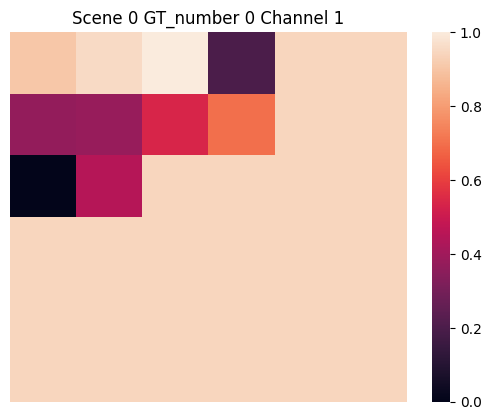

In [187]:
plot_channelwise_grid_points(0,0,1)

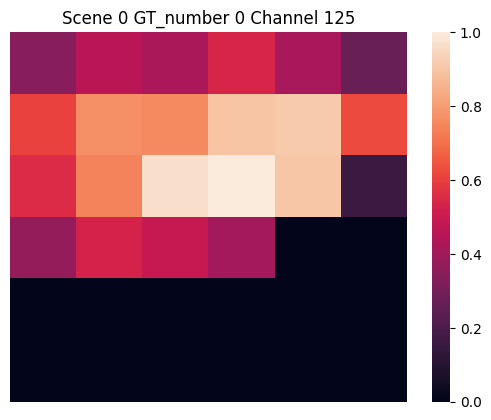

In [188]:
plot_channelwise_grid_points(0,0,125)

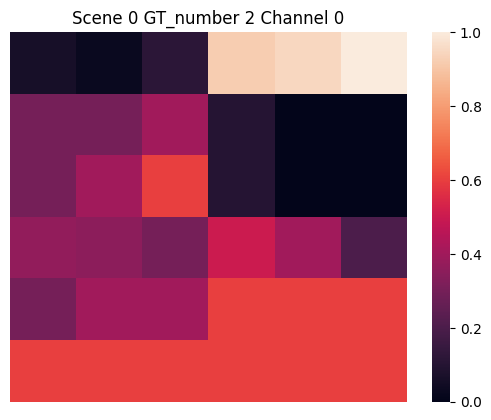

In [189]:
plot_channelwise_grid_points(0,2,0)

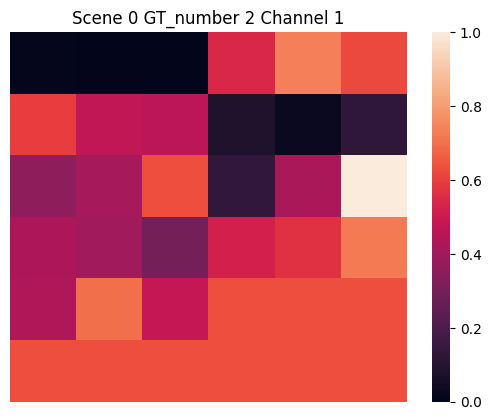

In [190]:
plot_channelwise_grid_points(0,2,1)

##### Method 2
1. Permute (6,6,6,128)
2. sum along 4th dimension (6,6,6)
3. select information and plot them (6,6,x) where x 0<=>6

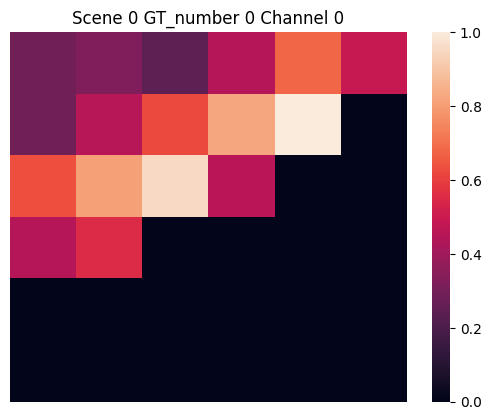

In [192]:
def plot_channelwise_grid_points_2(scene=0,gt_num=0,channel=0):
    grid_feat = torch.tensor(data['ens'][scene]['pooled_features_gt'][gt_num]).permute(1,2,3,0)# H,W,C
    grid_feat = grid_feat.sum(-1)
    grid_feat = grid_feat[:,:,channel] #H,W
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = (spatial_features.nan_to_num(0.0)).detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),vmin=0,vmax=1,xticklabels=False, yticklabels=False)
    plt.title('Scene {} GT_number {} Channel {}'.format(scene,gt_num,channel))
    plt.show()
plot_channelwise_grid_points_2(0,0,0)

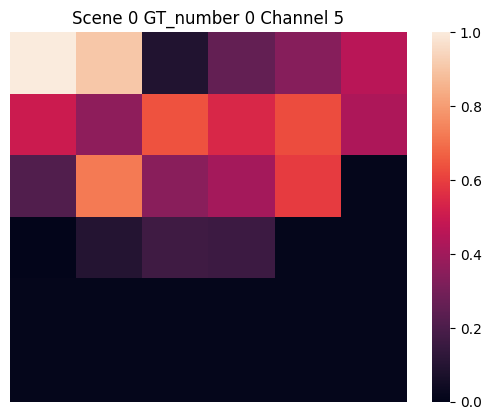

In [193]:
plot_channelwise_grid_points_2(0,0,5)


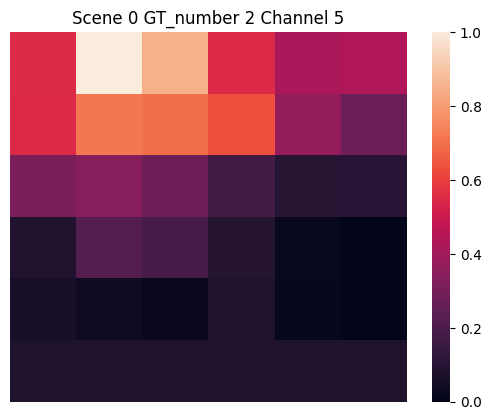

In [194]:
plot_channelwise_grid_points_2(0,2,5)

##### Method 3

Convert the feature map to 216*128 and plot

In [195]:
def plot_channelwise_grid_points_3(scene=0,gt_num=0):
    grid_feat = torch.tensor(data['ens'][scene]['pooled_features_gt'][gt_num]).view(128,-1) # H,W,C
    grid_feat = grid_feat.permute(1,0) #H,W # 216,128
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = grid_feat.detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
    plt.title('Scene {} GT_number {}'.format(scene,gt_num))
    plt.show()

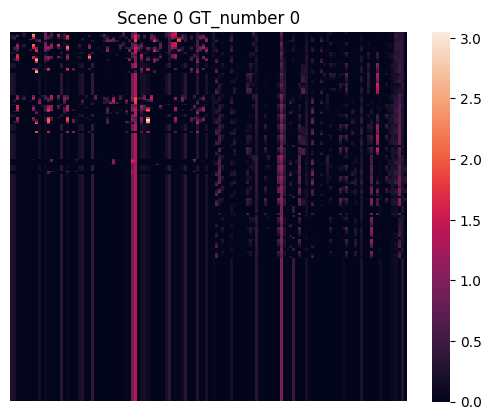

In [196]:
plot_channelwise_grid_points_3(0,0)

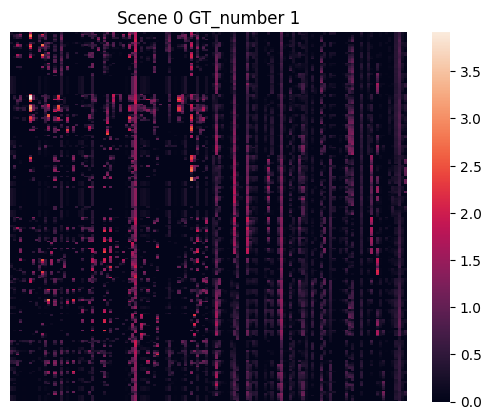

In [198]:
plot_channelwise_grid_points_3(0,1)

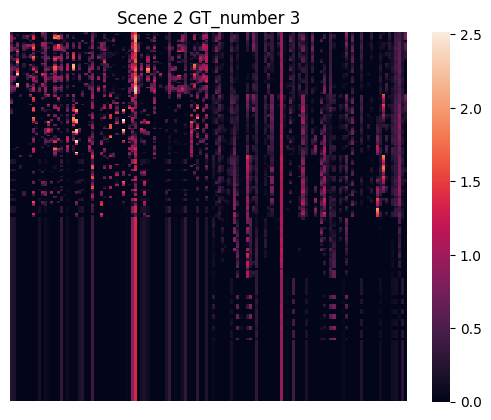

In [199]:
plot_channelwise_grid_points_3(2,3)

## Visualize pooled points

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'points' is a list or array containing your point cloud data
pooled_points = (torch.tensor(data['ens'][15]['pooled_points_gt'][0]).view(3,216)).transpose(0,1)
# Extract x, y, and z coordinates from the points
x = [p[1] for p in pooled_points]
y = [p[0] for p in pooled_points]
z = [p[2] for p in pooled_points]

# Create a scatter plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = plt.axes(projection='3d')  # Create a 3D axes
ax.scatter3D(x, y, z, cmap='viridis', s=50)  # Scatter plot the points

# Customize the plot if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

/tmp/ipykernel_21991/2408637411.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(x, y, z, cmap='viridis', s=50)  # Scatter plot the points


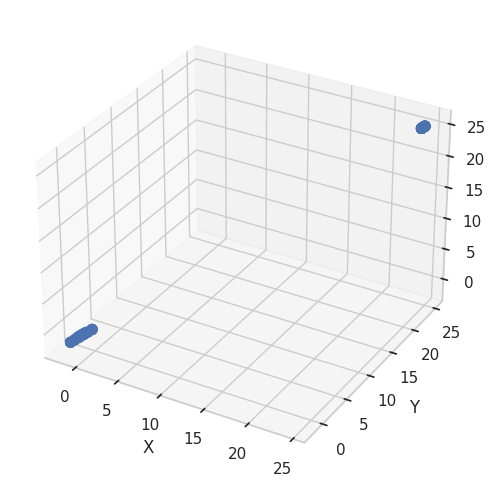

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'points' is a list or array containing your point cloud data
pooled_points = (torch.tensor(data['ens'][15]['pooled_points_gt'][20]).view(3,216)).transpose(0,1)
# Extract x, y, and z coordinates from the points
x = [p[0] for p in pooled_points]
y = [p[1] for p in pooled_points]
z = [p[2] for p in pooled_points]

# Create a scatter plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = plt.axes(projection='3d')  # Create a 3D axes
ax.scatter3D(x, y, z, cmap='viridis', s=50)  # Scatter plot the points

# Customize the plot if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [285]:
temp_list = []
for i,p in enumerate(pooled_points):
    gt_classes = torch.tensor(data['ens'][15]['gt_boxes'])[...,-1]
    rep = gt_classes[i].repeat(216,1)
    temp = torch.cat((p,rep),dim=1)
    temp_list.append(temp)
pooled_points = torch.cat(temp_list)

In [291]:
pooled_points

tensor([[[ 3.9976e+01,  4.0996e+01,  4.2015e+01,  1.0000e+00],
         [-2.4165e+01, -2.4900e+01, -2.5634e+01,  1.0000e+00],
         [-1.7998e+00, -1.7998e+00, -1.7998e+00,  1.0000e+00],
         ...,
         [ 4.1301e+01,  4.2320e+01,  4.3340e+01,  1.0000e+00],
         [-2.3401e+01, -2.4135e+01, -2.4869e+01,  1.0000e+00],
         [-4.8237e-01, -4.8237e-01, -4.8237e-01,  1.0000e+00]],

        [[ 1.6572e+01,  1.5484e+01,  1.4396e+01,  1.0000e+00],
         [ 8.4060e-01,  1.4822e+00,  2.1235e+00,  1.0000e+00],
         [-1.7768e+00, -1.7768e+00, -1.7768e+00,  1.0000e+00],
         ...,
         [ 1.5337e+01,  1.4249e+01,  1.3161e+01,  1.0000e+00],
         [-1.0255e-02,  6.3108e-01,  1.2727e+00,  1.0000e+00],
         [-4.4188e-01, -4.4188e-01, -4.4188e-01,  1.0000e+00]],

        [[ 2.0823e+01,  1.9647e+01,  1.8472e+01,  1.0000e+00],
         [-1.6701e+00, -9.6103e-01, -2.5196e-01,  1.0000e+00],
         [-1.7429e+00, -1.7429e+00, -1.7429e+00,  1.0000e+00],
         ...,
         

In [303]:
torch.stack(temp_list).shape

torch.Size([31, 216, 4])

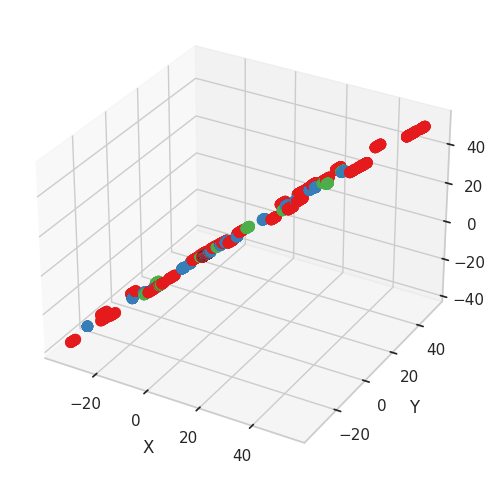

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

pooled_points = (torch.tensor(data['ens'][15]['pooled_points_gt']).view(-1,3,216)).transpose(1,2)
gt_classes = torch.tensor(data['ens'][15]['gt_boxes'])[...,-1]
temp_list = []
for i,p in enumerate(pooled_points):
    rep = gt_classes[i].repeat(216,1)
    temp = torch.cat((p,rep),dim=1)
    temp_list.append(temp)
pooled_points = torch.stack(temp_list)
# Extract x, y, and z coordinates from the points
x = pooled_points.view(-1,4)[:,0]
y = pooled_points.view(-1,4)[:,1]
z = pooled_points.view(-1,4)[:,2]
class_palette = sns.color_palette("Set1", 3)
c = pooled_points.view(-1,4)[:,3].to(int) - 1
cmap = [class_palette[i] for i in c]    
# Create a scatter plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = plt.axes(projection='3d')  # Create a 3D axes
ax.scatter3D(x, y, z, c=cmap, s=50)  # Scatter plot the points

# Customize the plot if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns

pooled_points = (torch.tensor(data_1['ens'][15]['pooled_points_gt']).view(-1,3,216)).transpose(1,2)
gt_classes = torch.tensor(data_1['ens'][15]['gt_boxes'])[...,-1]
temp_list = []
for i,p in enumerate(pooled_points):
    rep = gt_classes[i].repeat(216,1)
    temp = torch.cat((p,rep),dim=1)
    temp_list.append(temp)
pooled_points = torch.stack(temp_list)
# Extract x, y, and z coordinates from the points
x = pooled_points.view(-1,4)[:,0]
y = pooled_points.view(-1,4)[:,1]
z = pooled_points.view(-1,4)[:,2]
class_palette = sns.color_palette("Set1", 3)
c = pooled_points.view(-1,4)[:,3].to(int) - 1
# Create a scatter plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = plt.axes(projection='3d')  # Create a 3D axes
ax.scatter3D(x, y, z, cmap='viridis', s=50)  # Scatter plot the points

# Customize the plot if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

IndexError: index 23 is out of bounds for dimension 0 with size 23

In [293]:
(torch.tensor(data['ens'][15]['pooled_points_gt']).view(-1,3,216)).transpose(1,2).shape

torch.Size([31, 216, 3])

In [295]:
pooled_points[:,0].shape

torch.Size([31, 3])

/tmp/ipykernel_21991/2421606088.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(x, y, z, cmap='viridis', s=50)  # Scatter plot the points


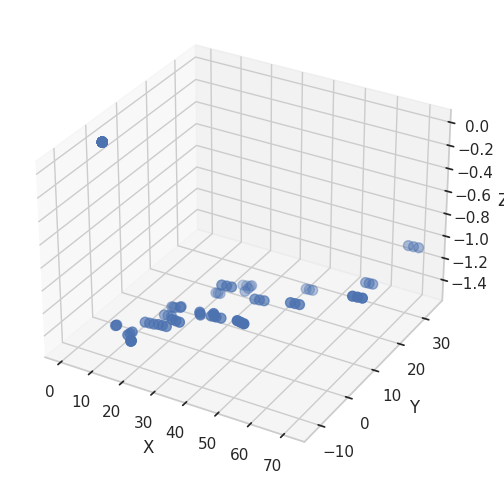

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'points' is a list or array containing your point cloud data
pooled_points = (torch.tensor(data_1['ens'][15]['pooled_points_gt']).view(-1,3,216)).transpose(1,2)
# Extract x, y, and z coordinates from the points
x = pooled_points[:, 0]
y = pooled_points[:, 1]
z = pooled_points[:, 2]

# Create a scatter plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = plt.axes(projection='3d')  # Create a 3D axes
ax.scatter3D(x, y, z, cmap='viridis', s=50)  # Scatter plot the points

# Customize the plot if needed
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

#### Visualize Shared Features (Num_GT * 256)
Method 1: Convert it to 16*16 grid

In [201]:
data['ens'][0].keys()

dict_keys(['spatial_features', 'spatial_features_2d', 'pooled_features_gt', 'pooled_points_gt', 'instance_idx', 'gt_classes', 'gt_boxes_bev', 'gt_boxes'])

In [28]:
def plot_shared_features(scene=0,gt_num=0):
    grid_feat = data['ens'][scene]['shared_features_gt'][gt_num] # 256
    grid_feat = grid_feat.view(16,16) # H,W
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = grid_feat.detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
    plt.title('Scene {} GT_number {}'.format(scene,gt_num))
    plt.show()

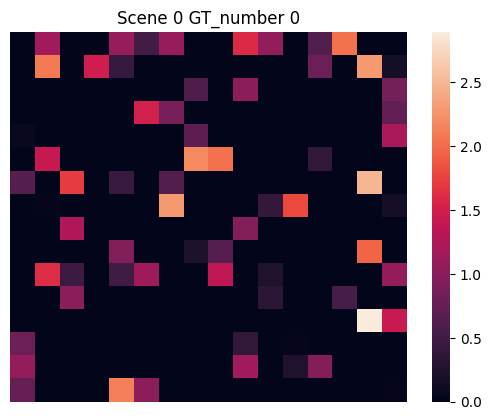

In [29]:
plot_shared_features(0,0)

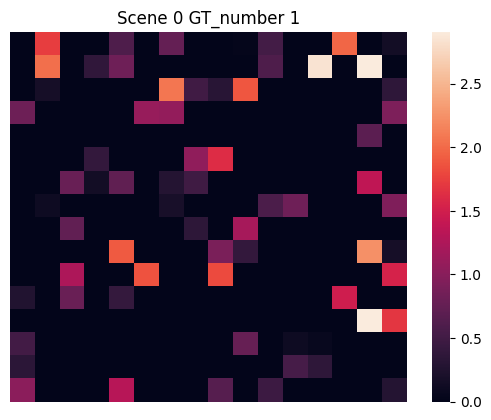

In [30]:
plot_shared_features(0,1)

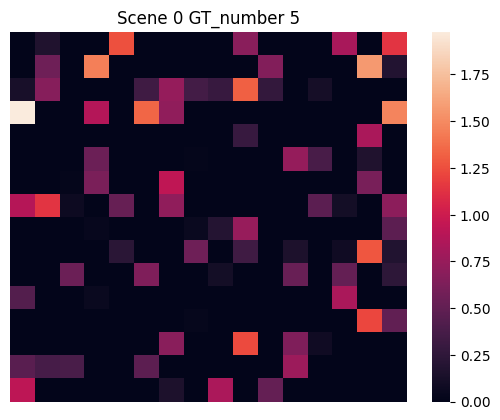

In [31]:
plot_shared_features(0,5)

# Ignore

### Method 2: Visualize 1*256 as such??

In [32]:
def plot_shared_features_2(scene=0,gt_num=0):
    grid_feat = data['ens'][scene]['shared_features_gt'][gt_num].unsqueeze(0) # 256
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = grid_feat.detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
    plt.title('Scene {} GT_number {}'.format(scene,gt_num))
    plt.show()

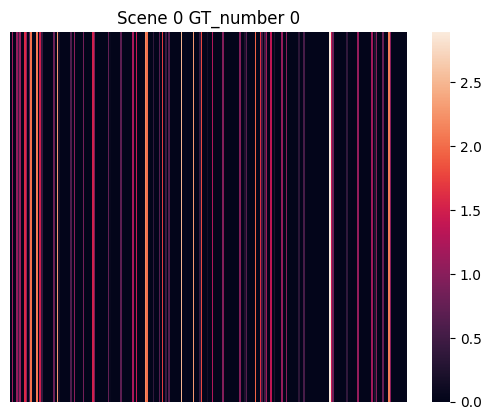

In [33]:
plot_shared_features_2(0,0)

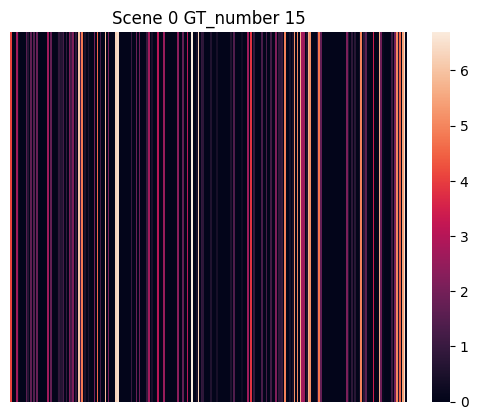

In [34]:
plot_shared_features_2(0,15)

### Prototype Creation

In [3]:
file_path = '/mnt/data/adat01/adv_OpenPCDet/tools/prototype_pooled_shared_0.01_gt_proto_no_aug.pkl'
# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    data_1 = pickle.load(file)

In [9]:
data2 = {}
data2['Car'] = data_1['Car']["mean"]["pool"]
data2['Ped'] = data_1['Ped']["mean"]["pool"]
data2['Cyc'] = data_1['Cyc']["mean"]["pool"]


In [10]:
data2.keys()

dict_keys(['Car', 'Ped', 'Cyc'])

In [11]:
data2["Car"]

tensor([[[[0.7626, 0.9407, 0.9450, 0.8435, 0.8668, 0.9566],
          [0.6489, 0.7891, 0.7243, 0.5650, 0.5852, 0.7172],
          [0.5973, 0.7000, 0.5833, 0.4147, 0.4363, 0.5325],
          [0.5058, 0.6067, 0.5348, 0.4017, 0.4174, 0.5126],
          [0.5931, 0.7018, 0.7017, 0.5540, 0.6001, 0.6657],
          [0.7433, 0.9431, 1.0012, 0.9140, 0.9711, 1.0245]],

         [[0.7580, 0.8794, 0.8560, 0.6576, 0.6665, 0.7910],
          [0.7025, 0.7723, 0.6863, 0.4471, 0.5100, 0.6439],
          [0.6343, 0.6761, 0.5518, 0.3542, 0.4049, 0.5379],
          [0.5317, 0.5941, 0.5114, 0.2914, 0.3779, 0.4949],
          [0.5750, 0.6849, 0.6339, 0.4328, 0.4421, 0.5510],
          [0.6858, 0.8500, 0.8798, 0.7090, 0.6732, 0.7560]],

         [[0.8553, 0.9431, 0.8866, 0.7039, 0.7375, 0.8704],
          [0.8112, 0.8725, 0.7562, 0.5142, 0.5720, 0.6994],
          [0.7920, 0.8035, 0.6585, 0.4239, 0.4718, 0.5998],
          [0.7363, 0.7705, 0.6313, 0.3872, 0.4565, 0.5791],
          [0.7105, 0.7959, 0.7110, 0

In [ ]:
with open('/mnt/data/adat01/adv_OpenPCDet/tools/refactor_proto_pooled_shared_0.01_gt_proto_no_aug.pkl', 'wb') as f:
    pickle.dump(data2, f)

In [8]:
data_1['Car']["mean"]["pool"].shape


torch.Size([128, 6, 6, 6])

In [5]:
dim0 = data_1['ens'][0]['pooled_features_gt'].shape[0]
data_1['ens'][0]['gt_boxes'][...,-1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.], dtype=float32)

In [6]:
car_pool_list = []
ped_pool_list = []
cyc_pool_list = []
car_sh_list = []
ped_sh_list = []
cyc_sh_list = []
for ens in data_1['ens']:
    dim0 = ens['gt_classes'].shape[0]
    gt_val = torch.tensor(ens['pooled_features_gt']) # [N, 128, 6*6*6] ==>[N, 216, 128]
    gt_sh = torch.tensor(ens['shared_features_gt']) # ([30, 256])
    gt_projected = torch.tensor(ens['projected_features_gt'])
    gt_classes = torch.tensor(ens['gt_boxes'])[...,-1]
    
    car_pool = gt_val[gt_classes==1]
    ped_pool = gt_val[gt_classes==2] 
    cyc_pool = gt_val[gt_classes==3]

    car_sh = gt_sh[gt_classes==1]
    ped_sh = gt_sh[gt_classes==2]
    cyc_sh = gt_sh[gt_classes==3]
    
    car_pool_list.append(car_pool)
    ped_pool_list.append(ped_pool)
    cyc_pool_list.append(cyc_pool)

    car_sh_list.append(car_sh)
    ped_sh_list.append(ped_sh)
    cyc_sh_list.append(cyc_sh)

In [7]:
car_pool = torch.cat(car_pool_list)
cyc_pool = torch.cat(cyc_pool_list)
ped_pool = torch.cat(ped_pool_list)

In [8]:
car_sh = torch.cat(car_sh_list)
ped_sh = torch.cat(ped_sh_list)
cyc_sh = torch.cat(cyc_sh_list)

In [9]:
temp = {}
temp['Car'] = {}
temp['Ped'] = {}
temp['Cyc'] = {}

temp['Car']['mean'] = {}
temp['Ped']['mean'] = {}
temp['Cyc']['mean'] = {}

temp['Car']['mean']['sh'] = car_sh
temp['Ped']['mean']['sh'] = ped_sh
temp['Cyc']['mean']['sh'] = cyc_sh

temp['Car']['mean']['pool'] = car_pool
temp['Ped']['mean']['pool'] = ped_pool
temp['Cyc']['mean']['pool'] = cyc_pool

In [10]:
with open('/mnt/data/deka01/openpcdet_st/tools/feature_bank_pooled_shared_projected_0.01_gt_proto_no_aug.pkl', 'wb') as f:
    pickle.dump(temp, f)

In [11]:
car_pool_prototype = car_pool.mean(dim=0)
ped_pool_prototype = ped_pool.mean(dim=0)
cyc_pool_prototype = cyc_pool.mean(dim=0)
car_sh_prototype = car_sh.mean(dim=0)
ped_sh_prototype = ped_sh.mean(dim=0)
cyc_sh_prototype = cyc_sh.mean(dim=0)

In [14]:
temp = {}
temp['Car'] = {}
temp['Ped'] = {}
temp['Cyc'] = {}

temp['Car']['mean'] = {}
temp['Ped']['mean'] = {}
temp['Cyc']['mean'] = {}

temp['Car']['mean']['sh'] = car_sh_prototype
temp['Ped']['mean']['sh'] = ped_sh_prototype
temp['Cyc']['mean']['sh'] = ped_sh_prototype

temp['Car']['mean']['pool'] = car_pool_prototype
temp['Ped']['mean']['pool'] = ped_pool_prototype
temp['Cyc']['mean']['pool'] = cyc_pool_prototype

In [15]:

with open('/mnt/data/deka01/openpcdet_st/tools/prototypes_pooled_shared_0.01_gt_proto_no_aug.pkl', 'wb') as f:
    pickle.dump(temp, f)

In [36]:
torch.tensor(ens['pooled_features_gt']).view(dim0,128,-1).permute(0,2,1).shape

torch.Size([36, 216, 128])

In [83]:
temp['cyc'].shape

torch.Size([128])

In [53]:
file_path = '/mnt/data/deka01/openpcdet_st/tools/feature_bank_100_p.pkl'

# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    data_100 = pickle.load(file)


In [54]:
data_100.keys()

dict_keys(['Car_cls', 'Ped_cls', 'Cyc_cls', 'Car_reg', 'Car_sh', 'Ped_reg', 'Ped_sh', 'Cyc_reg', 'Cyc_sh', 'Bg_sh'])

In [51]:
car_100 = torch.stack(data_100['Car_sh'],dim=0)
ped_100 = torch.stack(data_100['Ped_sh'],dim=0)
cyc_100 = torch.stack(data_100['Cyc_sh'],dim=0)

In [56]:
car_prototype = car_100.mean(dim=0)
ped_prototype = ped_100.mean(dim=0)
cyclist_prototype = cyc_100.mean(dim=0)

In [58]:
temp = {}
temp['Car'] = {}
temp['Ped'] = {}
temp['Cyc'] = {}

temp['Car']['mean'] = {}
temp['Ped']['mean'] = {}
temp['Cyc']['mean'] = {}

temp['Car']['mean']['sh'] = car_sh
temp['Ped']['mean']['sh'] = ped_sh
temp['Cyc']['mean']['sh'] = cyc_sh

temp['Car']['mean']['pool'] = car_pool
temp['Ped']['mean']['pool'] = ped_pool
temp['Cyc']['mean']['pool'] = cyc_pool

In [59]:
with open('/mnt/data/deka01/openpcdet_st/tools/feature_bank_pooled_shared_0.01.pkl', 'wb') as f:
    pickle.dump(temp, f)

In [60]:
file_path = '/mnt/data/deka01/openpcdet_st/tools/only_sh_cls_100.pkl'

# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    dummy_data = pickle.load(file)

In [48]:
file_path = '/mnt/data/deka01/openpcdet_st/tools/feature_bank_pooled_shared_0.01.pkl'

# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    data = pickle.load(file)

In [49]:
car_pool_ = torch.stack(data['Car_pool'])
ped_pool_ = torch.stack(data['Ped_pool'])
cyc_pool_ = torch.stack(data['Cyc_pool'])
car_pool = car_pool_.mean(dim=0)
ped_pool = ped_pool_.mean(dim=0)
cyc_pool = cyc_pool_.mean(dim=0)


In [50]:
car_sh_ = torch.stack(data['Car_sh'])
ped_sh_ = torch.stack(data['Ped_sh'])
cyc_sh_ = torch.stack(data['Cyc_sh'])
car_sh = car_sh_.mean(dim=0)
ped_sh = ped_sh_.mean(dim=0)
cyc_sh = cyc_sh_.mean(dim=0)


In [51]:
temp = {}
temp['Car'] = {}
temp['Ped'] = {}
temp['Cyc'] = {}

temp['Car']['mean'] = {}
temp['Ped']['mean'] = {}
temp['Cyc']['mean'] = {}

temp['Car']['mean']['sh'] = car_sh
temp['Ped']['mean']['sh'] = ped_sh
temp['Cyc']['mean']['sh'] = cyc_sh

temp['Car']['mean']['pool'] = car_pool
temp['Ped']['mean']['pool'] = ped_pool
temp['Cyc']['mean']['pool'] = cyc_pool

In [52]:
with open('/mnt/data/deka01/openpcdet_st/tools/prototypes_pooled_shared_0.01.pkl', 'wb') as f:
    pickle.dump(temp, f)

In [82]:
def plot_shared_features_roi(item_num=0,key=None):
    grid_feat = data[key][item_num] # 256
    grid_feat = grid_feat.view(16,16) # H,W
    mean = torch.mean(grid_feat)
    std = torch.std(grid_feat)
    spatial_features = (grid_feat - mean) / std
    spatial_features -= torch.min(spatial_features)
    spatial_features /= torch.max(spatial_features)
    spatial_features = grid_feat.detach().cpu().numpy()
    sns.heatmap(spatial_features,cmap=sns.color_palette("rocket",as_cmap=True),xticklabels=False, yticklabels=False)
    # plt.title('Scene {} GT_number {}'.format(item_num))
    plt.title('{}'.format(key))
    plt.show()

In [15]:
file_path = '/mnt/data/deka01/openpcdet_st/tools/prototypes_pooled_shared_0.01.pkl'

# Open the .pkl file in read mode
with open(file_path, 'rb') as file:
    # Load the data from the .pkl file
    test_data = pickle.load(file)

In [17]:
test_data['Car']['mean']['pool'].shape

torch.Size([128, 6, 6, 6])

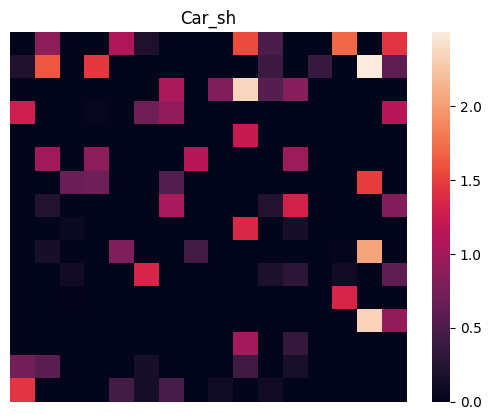

In [83]:
plot_shared_features_roi(0,'Car_sh')

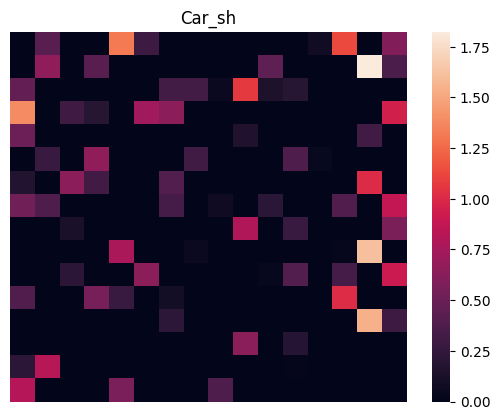

In [84]:
plot_shared_features_roi(13,'Car_sh')

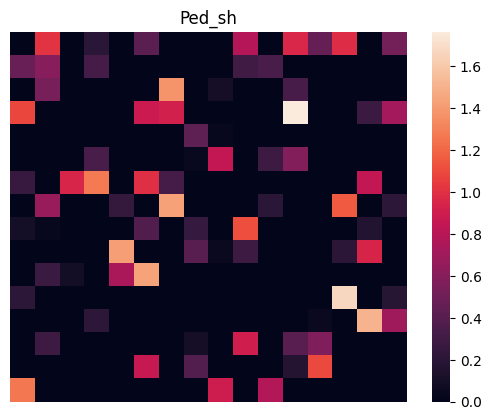

In [85]:
plot_shared_features_roi(0,'Ped_sh')

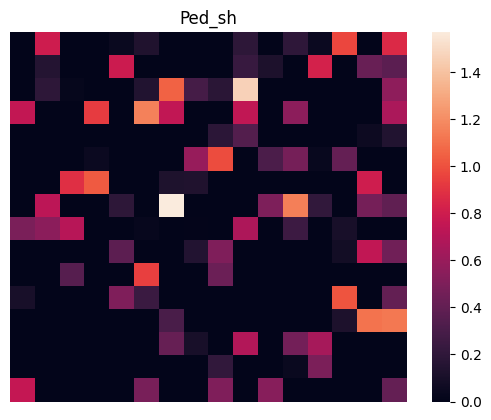

In [86]:
plot_shared_features_roi(3,'Ped_sh')

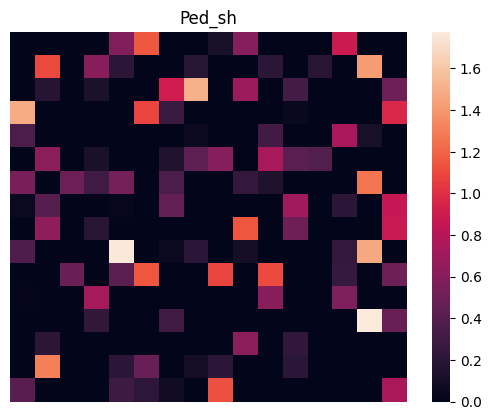

In [87]:
plot_shared_features_roi(5,'Ped_sh')

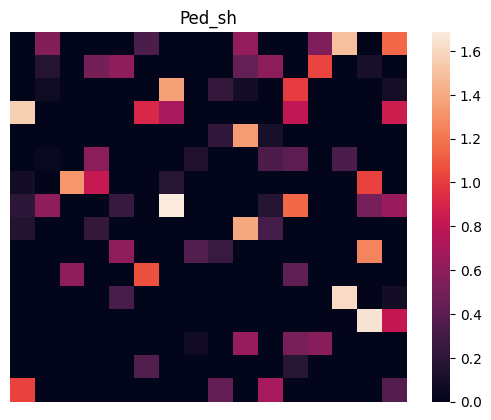

In [88]:
plot_shared_features_roi(10,'Ped_sh')